# NYC Taxi Trip Project

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
https://www1.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf
https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import glob
import warnings
from IPython import display

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')    

# Import Image

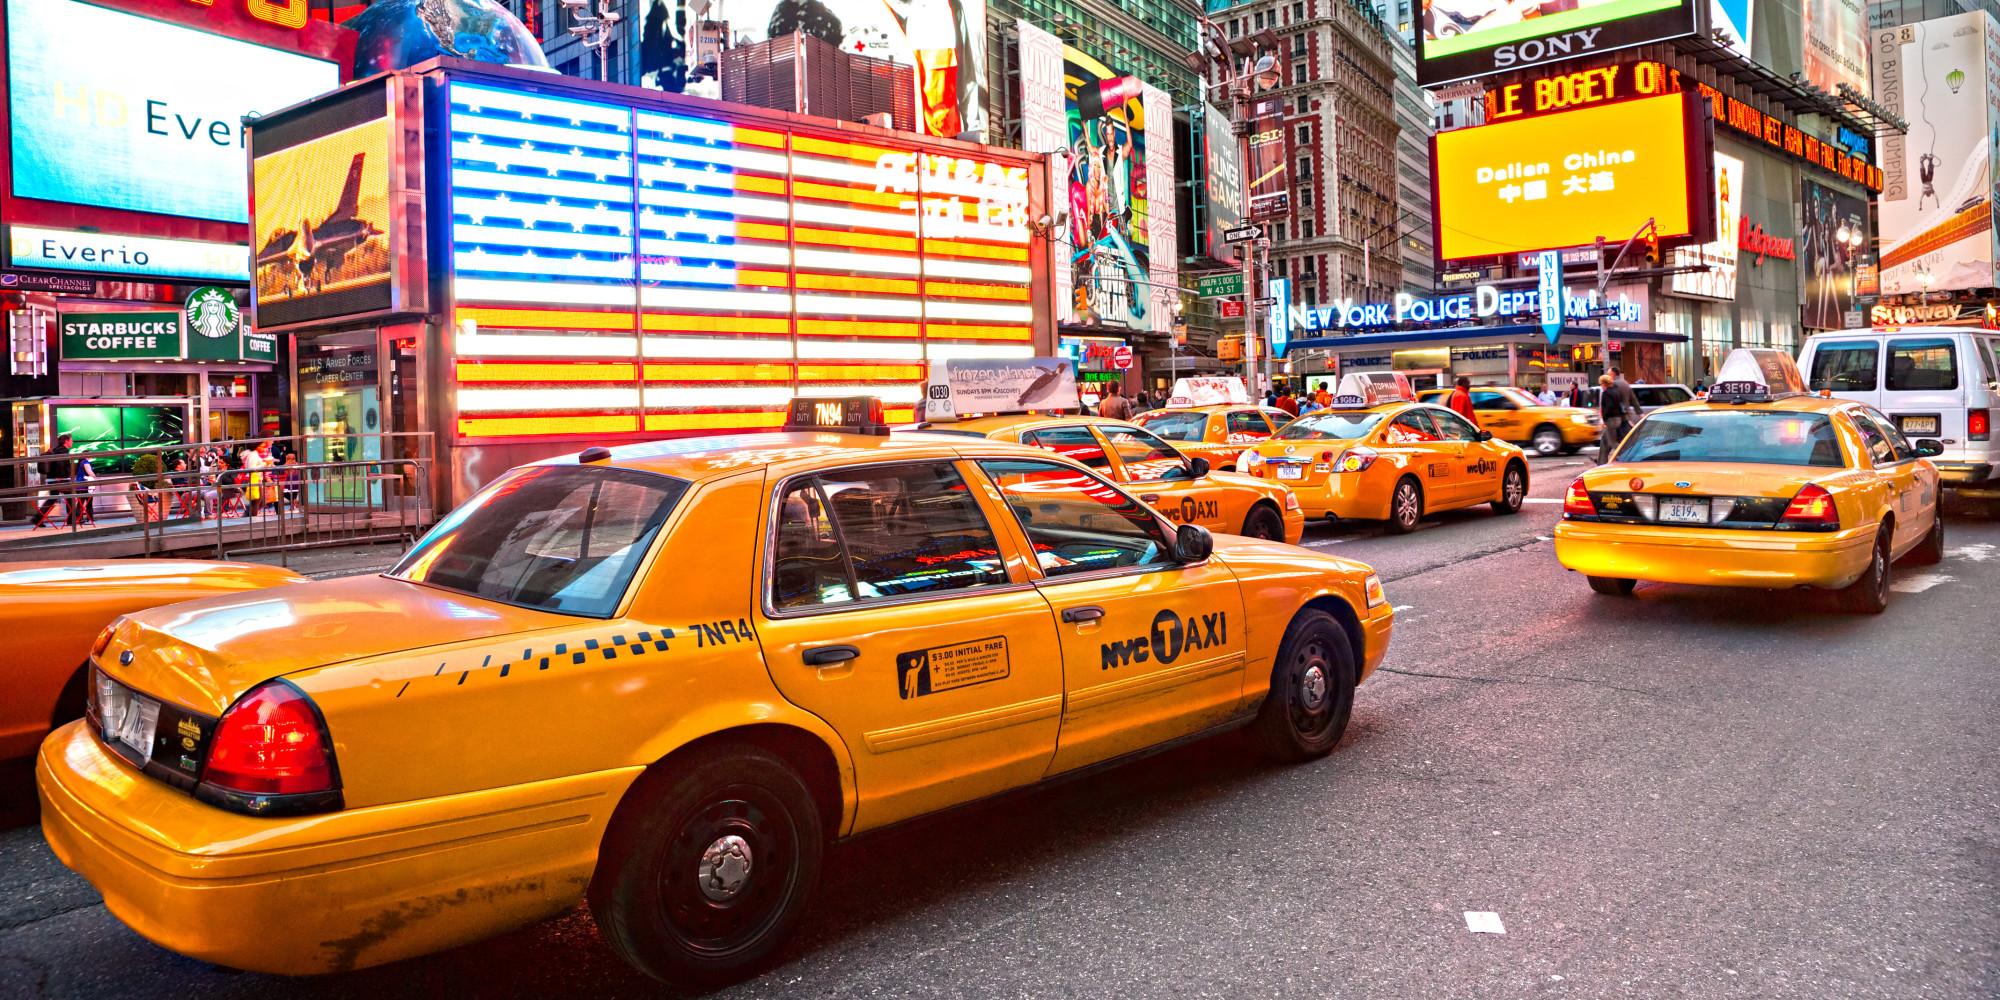

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'NYC Taxi Image.jpg')

display.Image(image_path)

# Import Datasets

In [4]:
files_directory = os.path.join(path_directory, 'datasets', 'TLC Trip Record Data', '*.parquet')
files = glob.glob(files_directory)

# create an empty list to store dataframes
frame = []

# list comprehension to read all files
[frame.append(pd.read_parquet(file)) for file in files]


# concatenate dataframes into a single dataframe
df = pd.concat(frame)

# View Dataframe

In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558119,1,2022-06-30 23:45:51,2022-06-30 23:51:48,NaN,0.00,NaN,None,148,256,0,9.20,0.5,0.5,0.00,0.0,0.3,15.00,NaN,NaN
3558120,2,2022-06-30 23:25:00,2022-06-30 23:40:00,NaN,5.01,NaN,None,79,262,0,18.86,0.0,0.5,5.19,0.0,0.3,27.35,NaN,NaN
3558121,2,2022-06-30 23:29:00,2022-06-30 23:37:00,NaN,1.55,NaN,None,164,79,0,10.03,0.0,0.5,3.10,0.0,0.3,16.43,NaN,NaN
3558122,2,2022-06-30 23:24:15,2022-06-30 23:50:19,NaN,5.30,NaN,None,211,239,0,24.34,0.0,0.5,0.00,0.0,0.3,27.64,NaN,NaN


In [6]:
df.columns = [col.lower() for col in df.columns]                          # change column names to lower cases
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [7]:
df.shape

(19817583, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19817583 entries, 0 to 3558123
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   vendorid               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   ratecodeid             float64       
 6   store_and_fwd_flag     object        
 7   pulocationid           int64         
 8   dolocationid           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee          

In [9]:
df.dtypes.value_counts()

float64           12
int64              4
datetime64[ns]     2
object             1
dtype: int64

In [10]:
df.select_dtypes(include='float64').describe()

,passenger_count,trip_distance,ratecodeid,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.91457e+07,1.98176e+07,1.91457e+07,1.98176e+07,1.98176e+07,1.98176e+07,1.98176e+07,1.98176e+07,1.98176e+07,1.98176e+07,1.91457e+07,1.91457e+07
mean,1.39674e+00,5.94540e+00,1.40646e+00,1.42457e+01,1.01847e+00,4.90180e-01,2.66228e+00,4.95487e-01,2.96517e-01,2.09028e+01,2.29121e+00,8.94640e-02
std,9.72335e-01,6.06314e+02,5.72330e+00,1.27873e+02,1.24838e+00,8.71322e-02,3.18307e+00,1.96953e+00,4.51893e-02,1.28271e+02,7.32908e-01,3.24898e-01
min,0.00000e+00,0.00000e+00,1.00000e+00,-2.56400e+03,-7.00000e+00,-5.00000e-01,-4.10000e+02,-8.30000e+01,-3.00000e-01,-2.56780e+03,-2.50000e+00,-1.25000e+00
25%,1.00000e+00,1.10000e+00,1.00000e+00,7.00000e+00,0.00000e+00,5.00000e-01,1.00000e+00,0.00000e+00,3.00000e-01,1.20000e+01,2.50000e+00,0.00000e+00
50%,1.00000e+00,1.87000e+00,1.00000e+00,1.00000e+01,5.00000e-01,5.00000e-01,2.15000e+00,0.00000e+00,3.00000e-01,1.55100e+01,2.50000e+00,0.00000e+00
75%,1.00000e+00,3.46000e+00,1.00000e+00,1.55000e+01,2.50000e+00,5.00000e-01,3.26000e+00,0.00000e+00,3.00000e-01,2.22500e+01,2.50000e+00,0.00000e+00
max,9.00000e+00,3.57193e+05,9.90000e+01,4.01092e+05,3.35000e+01,1.71000e+01,1.40016e+03,9.11870e+02,3.00000e-01,4.01096e+05,2.75000e+00,1.25000e+00


In [11]:
df.select_dtypes(include='datetime64[ns]').describe()

,tpep_pickup_datetime,tpep_dropoff_datetime
count,19817583,19817583
unique,9868438,9862363
top,2022-05-06 19:22:00,2022-06-19 00:00:00
freq,16,34
first,2001-08-23 05:34:45,2001-08-23 05:57:11
last,2023-04-18 14:30:05,2023-04-18 23:30:39


In [12]:
# filter datetime between 1st January 2022 and 30th June 2022
df1 = df.query("tpep_pickup_datetime >= '2022-01-01' & tpep_dropoff_datetime <= '2022-06-30'")
df1

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554018,2,2022-06-29 23:29:08,2022-06-29 23:44:37,NaN,3.19,NaN,None,148,68,0,15.30,0.0,0.5,1.00,0.0,0.3,19.60,NaN,NaN
3554019,2,2022-06-29 23:03:31,2022-06-29 23:20:16,NaN,7.26,NaN,None,74,4,0,27.66,0.0,0.5,0.00,0.0,0.3,30.96,NaN,NaN
3554020,2,2022-06-29 23:34:44,2022-06-29 23:40:13,NaN,1.29,NaN,None,158,186,0,10.06,0.0,0.5,2.31,0.0,0.3,15.67,NaN,NaN
3554021,2,2022-06-29 23:13:00,2022-06-29 23:26:00,NaN,1.89,NaN,None,249,148,0,10.08,0.0,0.5,4.00,0.0,0.3,17.38,NaN,NaN


In [13]:
df1['vendorid'].value_counts()

2    13854540
1     5807237
6       39698
5         118
Name: vendorid, dtype: int64

In [14]:
df1['pulocationid'].value_counts(ascending=False).head(10)

237    943069
132    864075
236    856614
161    769124
142    648022
162    631846
186    627373
48     615662
170    608395
230    600873
Name: pulocationid, dtype: int64

In [15]:
df1['dolocationid'].value_counts(ascending=False).head(10)

236    876419
237    818887
161    698771
170    583962
230    559636
239    558118
142    547164
141    545776
48     534661
162    510046
Name: dolocationid, dtype: int64

In [16]:
df1['payment_type'].value_counts()

1    15017276
2     3842446
0      667773
3       87907
4       86188
5           3
Name: payment_type, dtype: int64

In [17]:
df1['ratecodeid'].value_counts()

1.0     18085444
2.0       679535
5.0       130315
99.0       64830
3.0        49199
4.0        24320
6.0          177
Name: ratecodeid, dtype: int64

In [18]:
df1['store_and_fwd_flag'].value_counts()

N    18704876
Y      328944
Name: store_and_fwd_flag, dtype: int64

# Data Transformation

In [19]:
df1['vendorid_labels'] = df1['vendorid'].map(
                                    {
                                      1: 'Creative Mobile Technologies',
                                      2: 'VeriFone Inc',
                                      5: 'Unknown_5',
                                      6: 'Unknown_6'
                                    }
                                  )

df1['vendorid_labels'].value_counts()

VeriFone Inc                    13854540
Creative Mobile Technologies     5807237
Unknown_6                          39698
Unknown_5                            118
Name: vendorid_labels, dtype: int64

In [20]:
df1['payment_type_label'] = df1['payment_type'].map(
                                                    {
                                                      0: 'Unknown_0',
                                                      1: 'Credit card',
                                                      2: 'Cash',
                                                      3: 'No charge',
                                                      4: 'Dispute',
                                                      5: 'Unknown'
                                                    }
                                                  )

df1['payment_type_label'].value_counts()

Credit card    15017276
Cash            3842446
Unknown_0        667773
No charge         87907
Dispute           86188
Unknown               3
Name: payment_type_label, dtype: int64

In [21]:
df1['ratecode_label'] = df1['ratecodeid'].map(
                                              {
                                                1: 'Standard rate',
                                                2: 'JFK',
                                                3: 'Newark',
                                                4: 'Nassau or Westchester',
                                                5: 'Negotiated fare',
                                                99: 'Unknown'
                                              }
                                            )

df1['ratecode_label'].value_counts()

Standard rate            18085444
JFK                        679535
Negotiated fare            130315
Unknown                     64830
Newark                      49199
Nassau or Westchester       24320
Name: ratecode_label, dtype: int64

In [22]:
df1['trip_in_vehicle'] = df1['store_and_fwd_flag'].map(
                                                        {
                                                          'Y': 'store and forward trip',
                                                          'N': 'not a store and forward trip'
                                                        }
                                                      )

df1['trip_in_vehicle'].value_counts()

not a store and forward trip    18704876
store and forward trip            328944
Name: trip_in_vehicle, dtype: int64

In [23]:
df1['overall_trip_duration'] = np.subtract(df1['tpep_dropoff_datetime'], df1['tpep_pickup_datetime'])
df1['overall_trip_duration']

0         0 days 00:17:49
1         0 days 00:08:24
2         0 days 00:08:58
3         0 days 00:10:02
4         0 days 00:37:32
                ...      
3554018   0 days 00:15:29
3554019   0 days 00:16:45
3554020   0 days 00:05:29
3554021   0 days 00:13:00
3554024   0 days 00:19:17
Name: overall_trip_duration, Length: 19701593, dtype: timedelta64[ns]

In [24]:
df1['trip_duration_in_days'] = df1['overall_trip_duration'].dt.days
df1['trip_duration_in_days']

0          0
1          0
2          0
3          0
4          0
          ..
3554018    0
3554019    0
3554020    0
3554021    0
3554024    0
Name: trip_duration_in_days, Length: 19701593, dtype: int64

In [25]:
df1['trip_duration_in_seconds'] = df1['overall_trip_duration'].dt.seconds
df1['trip_duration_in_seconds']

0          1069
1           504
2           538
3           602
4          2252
           ... 
3554018     929
3554019    1005
3554020     329
3554021     780
3554024    1157
Name: trip_duration_in_seconds, Length: 19701593, dtype: int64

In [26]:
df1['trip_duration_in_minutes'] = df1['trip_duration_in_seconds'].apply(lambda x: round((x / 60), 0))
df1['trip_duration_in_minutes']

0          18.0
1           8.0
2           9.0
3          10.0
4          38.0
           ... 
3554018    15.0
3554019    17.0
3554020     5.0
3554021    13.0
3554024    19.0
Name: trip_duration_in_minutes, Length: 19701593, dtype: float64

# Exploratory Data Analysis

In [27]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.0f' % (x * 1)

format_orig = FuncFormatter(original)



def cntplot(data: pd.DataFrame, orient: str, palette: str|list|dict, dodge: bool, x=None, y=None, hue=None, order=None, hue_order=None, color=None, ax=None):
  '''
  
  Helper function for plotting countplots

  Parameters
  ----------

  data: pd.DataFrame
        pandas dataframe

  orient: str
        orientation of the plot
  
  palette: palette name, list or dict
        colors to use for different levels

  dodge: bool
        whether elements should be shifted along the categorial axis

  x,y,hue: None
        inputs for plotting long-form data

  Returns: ax
        Returns the axes object with the plot drawn
        
  '''

  return sns.countplot(data=data, x=x, y=y, hue=hue, order=order, hue_order=hue_order, orient=orient, color=color, palette=palette, dodge=dodge, ax=ax)



def plot_pie(shadow: bool, startangle: float, normalize: bool, x=None, labels=None, explode=None, autopct=None, colors=None, data=None):
      '''
      Helper function for plotting pie charts

      Parameters
      ----------

      data: pd.DataFrame
           pandas dataframe

      x: None
           array like
      
      explode: None
            fraction of radius to offset each wedge
      
      autopct: None
            string function to label chart

      shadow: True
            draw shadow beneath the pie
      
      normalize: bool
            when true, makes a full pie 

      startangle: float
            angle by which the start of the pie is rotated
            

      Returns: pie chart
      
      '''

      return plt.pie(x=x, explode=explode, labels=labels, autopct=autopct, shadow=shadow, startangle=startangle, normalize=normalize, colors=colors, data=data)




# helper function for plotting bar charts
def plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, palette=palette,
        ci=ci, 
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_bar



# helper function to plot line charts
def plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, palette=palette, 
        style=style, 
        ci=ci, ax=ax)

    # label plot axes
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot 
    sns.despine(bottom=True, left=True)

    return plot_line



# helper function to get specific date range
def fetch_data(data, ascending=None, before=None, after=None, rule=None):
    return data.sort_index(ascending=ascending).truncate(before=before, after=after).resample(rule=rule)


# helper function to plot specific date range
def plot_date_rng(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data,
        x=x, y=y,
        hue=hue, palette=palette, 
        size=size, style=style,
        ci=None, ax=ax
    )

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_date_rng

[Text(0.5, 1.0, 'Pie chart of TPEP provider')]

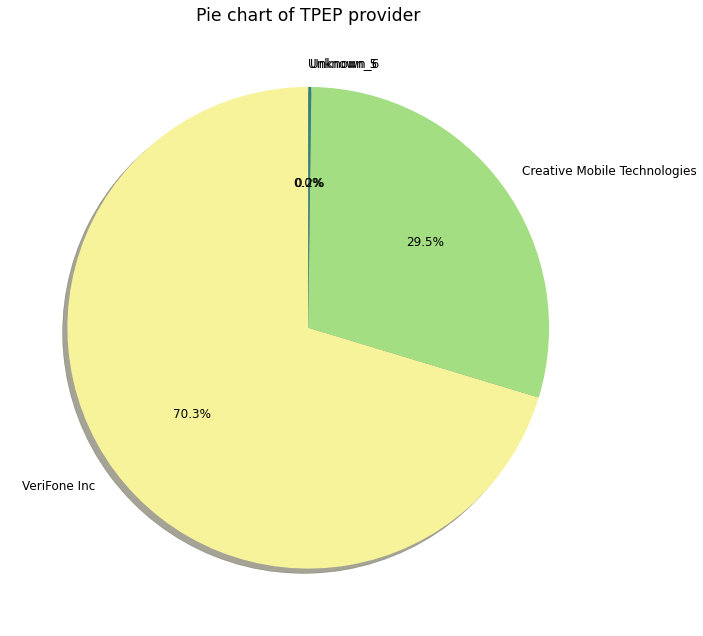

In [28]:
#colors
colors = ['#f7f39a','#a3de83','#38817a','#346473']

fig, ax = plt.subplots()

plot_pie(
  x=df1['vendorid_labels'].value_counts(True).values, labels=df1['vendorid_labels'].value_counts(True).keys(), autopct='%1.1f%%',
  shadow=True, startangle=90, normalize=True, explode=[0, 0, 0, 0], colors=colors
)

ax.set(title='Pie chart of TPEP provider')

[Text(0.5, 1.0, 'Countplot of payment type'), Text(0.5, 0, 'Payment Type')]

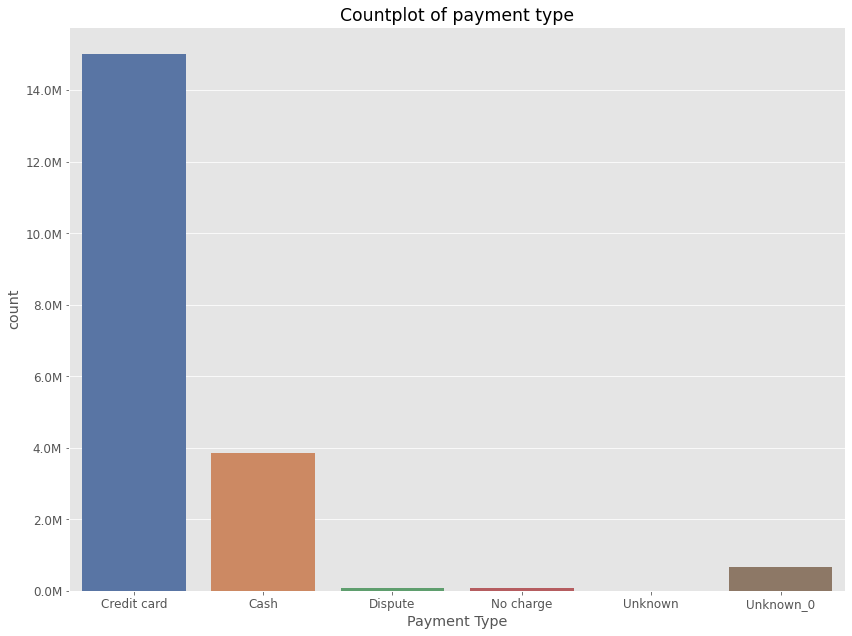

In [29]:
fig, ax = plt.subplots()

cntplot(data=df1, x='payment_type_label', orient='v', palette='deep', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_mill))
ax.set(title='Countplot of payment type', xlabel='Payment Type')

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

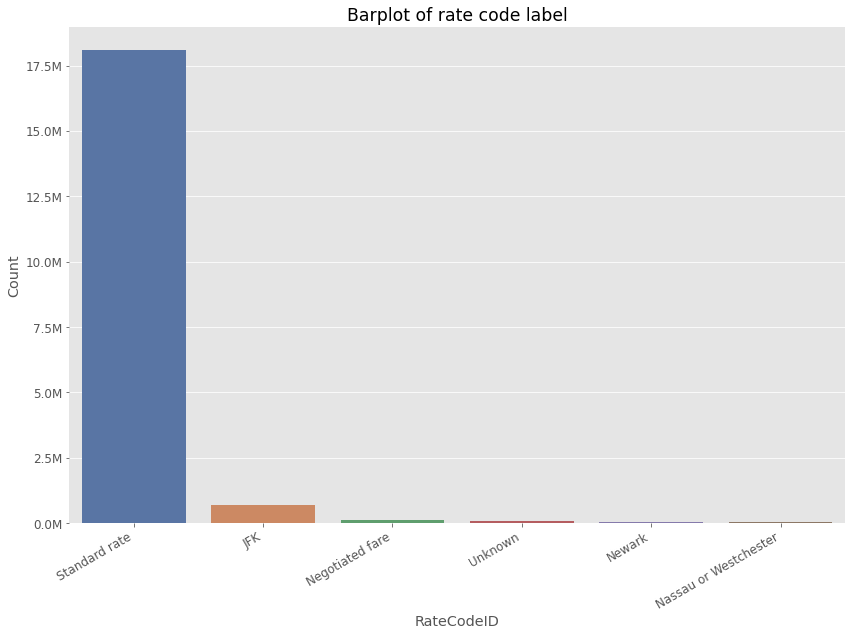

In [30]:
plot_bar(
  x=df1['ratecode_label'].value_counts().keys(), y=df1['ratecode_label'].value_counts().values, 
  palette='deep', xlabel='RateCodeID', ylabel='Count', title='Barplot of rate code label',
  formatter=format_mill
  )

[Text(0.5, 1.0, 'Pie chart of Store_and_fwd_flag')]

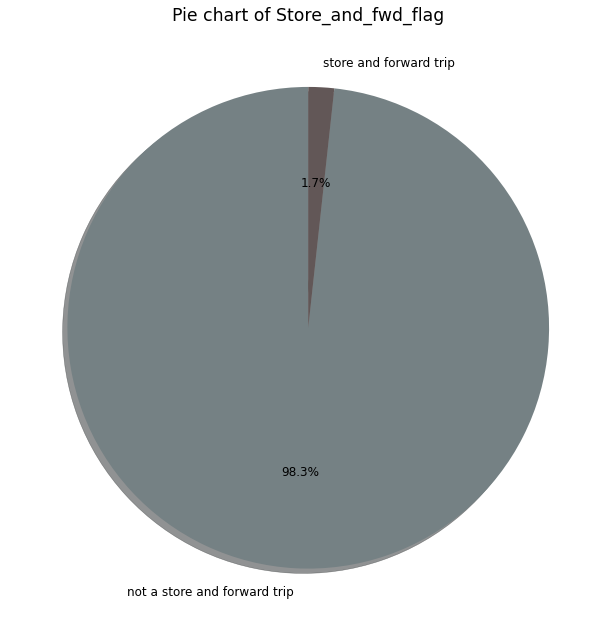

In [31]:
# add colors
colors = ['#758184', '#625757']


fig, ax = plt.subplots()

plot_pie(
  x=df1['trip_in_vehicle'].value_counts(True).values, labels=df1['trip_in_vehicle'].value_counts(True).keys(), autopct='%1.1f%%',
  shadow=True, startangle=90, normalize=True, explode=[0, 0], colors=colors
)

ax.set(title='Pie chart of Store_and_fwd_flag')